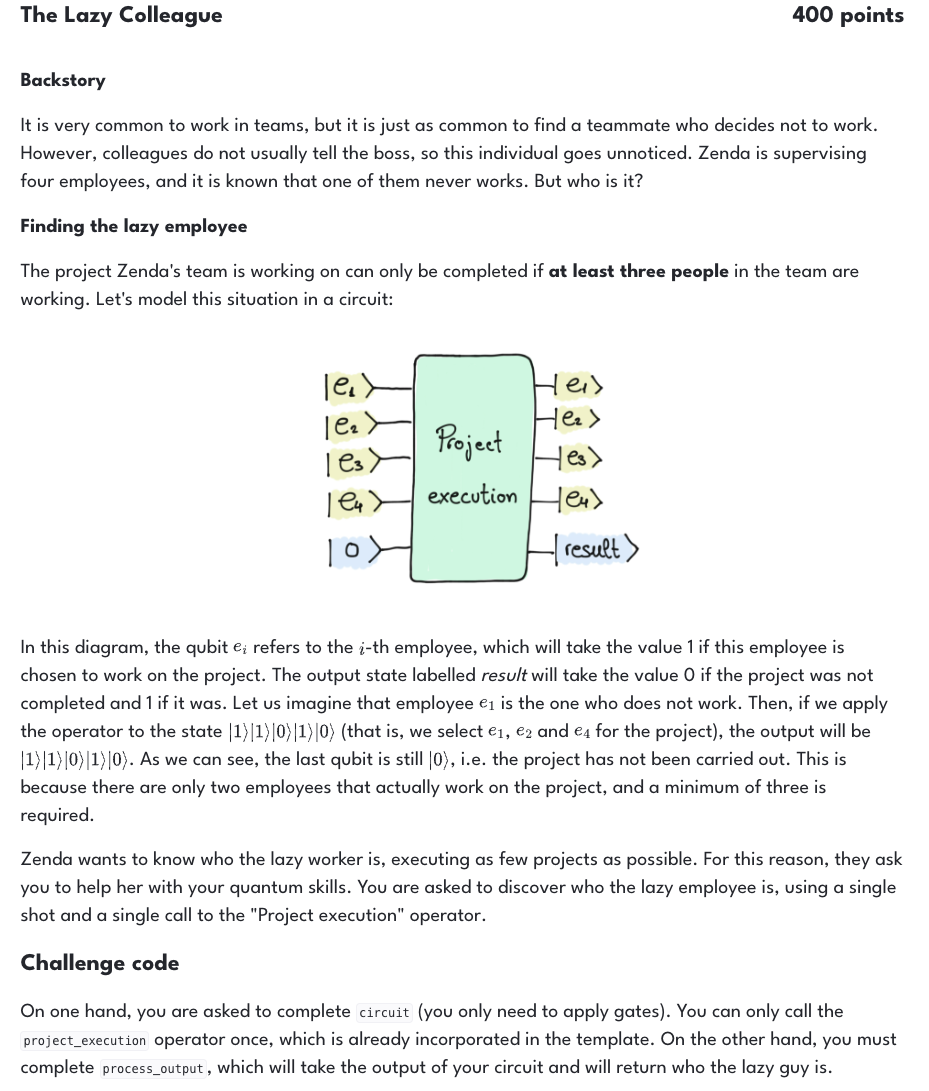

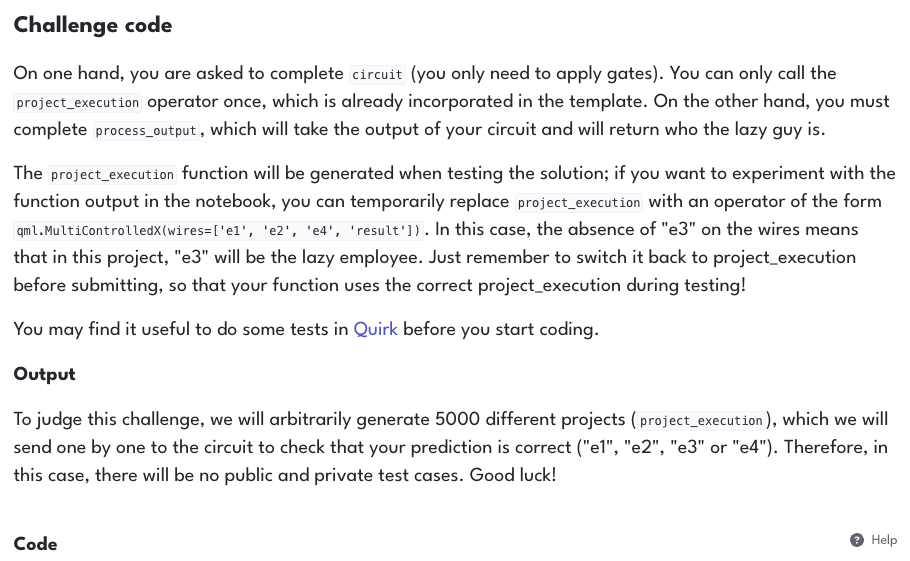

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=["e1", "e2", "e3", "e4", "result"], shots=1)
dev.operations.add("op")

wires = ["e1", "e2", "e3", "e4", "result"]


@qml.qnode(dev)
def circuit(project_execution):
    """This is the circuit we will use to detect which is the lazy worker. Remember 
    that we will only execute one shot.

    Args:
        project_execution (qml.ops): 
            The gate in charge of marking in the last qubit if the project has been finished
            as indicated in the statement.

    Returns:
        (numpy.tensor): Measurement output in the 5 qubits after a shot.
    """
    # Put your code here #
    project_execution(wires=wires)
    # Put your code here #
    return qml.sample(wires=dev.wires)

def process_output(measurement):
    """This function will take the circuit measurement and process it to determine who is the lazy worker.

    Args:
        measurement (numpy.tensor): Measurement output in the 5 qubits after a shot.

    Returns:
        (str): This function must return "e1", "e2" "e3" or "e4" - the lazy worker.
    """
    # Put your code here #


# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:
    samples = 5000

    solutions = []
    output = []

    for s in range(samples):
        lazy = np.random.randint(0, 4)
        no_lazy = list(range(4))
        no_lazy.pop(lazy)

        def project_execution(wires):
            class op(qml.operation.Operator):
                num_wires = 5

                def compute_decomposition(self, wires):
                    raise ValueError("You cant descompose this gate")

                def matrix(self):
                    m = np.zeros([32, 32])
                    for i in range(32):
                        b = [int(j) for j in bin(64 + i)[-5:]]
                        if sum(np.array(b)[no_lazy]) == 3:
                            if b[-1] == 0:
                                m[i, i + 1] = 1
                            else:
                                m[i, i - 1] = 1
                        else:
                            m[i, i] = 1
                    return m

            op(wires=wires)
            return None

        out = circuit(project_execution)
        solutions.append(lazy + 1)
        output.append(int(process_output(out)[-1]))

    assert np.allclose(
        output, solutions, rtol=1e-4
    ), "Your circuit does not give the correct output."

    ops = [op.name for op in circuit.tape.operations]
    assert ops.count("op") == 1, "You have used the oracle more than one time."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")